In [118]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [258]:
import re

In [119]:
df = pd.read_csv('glassdoor_jobs.csv')

In [120]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [121]:
df.shape

(956, 15)

In [122]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


In [144]:
df = df[df['Salary Estimate'] != '-1']

In [145]:
df['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoor est.

In [199]:
df[['Salary Estimate']].sample(5)

,Salary Estimate
331,Employer Provided Salary:$200K-$250K
852,$61K-$113K (Glassdoor est.)
705,$86K-$137K (Glassdoor est.)
597,$94K-$153K (Glassdoor est.)
73,$60K-$99K (Glassdoor est.)


In [200]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [201]:
df.shape

(742, 16)

In [202]:
df['Salary Estimate'] = df['Salary Estimate'].str.split('(',n=1).str[0]
#removing k and $
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\$','').str.replace('K','000').str.strip()

In [32]:
min_hr = df['Salary Estimate'].apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [203]:
df['min_salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))


In [204]:
df['min_salary']=df.apply(lambda x: x['min_salary']*2080 if x['hourly']==1 else x['min_salary'],axis=1)
df['max_salary']=df.apply(lambda x: x['max_salary']*2080 if x['hourly']==1 else x['max_salary'],axis=1)

In [205]:
print(df['min_salary'].tolist())

[53000, 63000, 80000, 56000, 86000, 71000, 54000, 86000, 38000, 120000, 126000, 64000, 106000, 46000, 83000, 102000, 67000, 118000, 110000, 64000, 81000, 73000, 86000, 63000, 109000, 63000, 75000, 34000, 63000, 80000, 56000, 72000, 86000, 93000, 85000, 77000, 82000, 83000, 115000, 74000, 64000, 68000, 110000, 52000, 110000, 150000, 158000, 20000, 56000, 63000, 68000, 86000, 41000, 86000, 80000, 56000, 120000, 111000, 54000, 71000, 82000, 84000, 107000, 49000, 61000, 88000, 60000, 41000, 96000, 65000, 52000, 139000, 50000, 85000, 74000, 99000, 79000, 57000, 83000, 86000, 94000, 37000, 100000, 55000, 60000, 39000, 106000, 86000, 64000, 31000, 34000, 117000, 64000, 79000, 52000, 55000, 72000, 74000, 40000, 102000, 89000, 61000, 65000, 200000, 68000, 80000, 41000, 39000, 38000, 121000, 54000, 83000, 120000, 102000, 76000, 60000, 82000, 65000, 91000, 95000, 77000, 80000, 85000, 80000, 43000, 29000, 82000, 26000, 61000, 60000, 112000, 64000, 51000, 113000, 72000, 71000, 64000, 118000, 120000

In [217]:
df['avg_salary'] = (df['min_salary'] + df['max_salary']) // 2

In [261]:
labels = ['Low', 'Medium', 'High', 'Very High']    
df['SalaryCategory'] = pd.cut(df['avg_salary'], bins=4, labels=labels, right=False)

In [ ]:
#job description

In [252]:
print(df['Job Description'].iloc[1])

What You Will Do:

I. General Summary

The Healthcare Data Scientist position will join our Advanced Analytics group at the University of Maryland Medical System (UMMS) in support of its strategic priority to become a data-driven and outcomes-oriented organization. The successful candidate will have 3+ years of experience with Machine Learning, Predictive Modeling, Statistical Analysis, Mathematical Optimization, Algorithm Development and a passion for working with healthcare data. Previous experience with various computational approaches along with an ability to demonstrate a portfolio of relevant prior projects is essential. This position will report to the UMMS Vice President for Enterprise Data and Analytics (ED&A).

II. Principal Responsibilities and Tasks

• Develops predictive and prescriptive analytic models in support of the organization’s clinical, operations and business initiatives and priorities.
• Deploys solutions so that they provide actionable insights to the organizat

In [253]:
def extract_skills(description):
    # List of skills to look for in the job description
    skills = ['Python', 'R', 'SQL', 'Java', 'C++', 'Scala', 'Julia']
    # Return a list of skills found in the description, case insensitive
    return [skill for skill in skills if skill.lower() in description.lower()]

In [254]:
def extract_education(description):
    # List of educational qualifications to look for
    education_levels = ['Bachelor', 'Master', 'PhD', 'Doctorate']
    # Return a list of education levels found in the description, case insensitive
    return [level for level in education_levels if level.lower() in description.lower()]

In [255]:
def extract_experience(description):
    # Regular expression to search for years of experience (e.g., "3 years", "5yr")
    experience = re.search(r'(\d+)\+?\s*(?:year|yr)s?', description, re.IGNORECASE)
    # Return the number of years as an integer, or NaN if not found
    return int(experience.group(1)) if experience else np.nan

In [256]:
df['Skills'] = df['Job Description'].apply(extract_skills)         # Extract skills
df['Education'] = df['Job Description'].apply(extract_education)   # Extract education levels
df['Years_Experience'] = df['Job Description'].apply(extract_experience)  # Extract years of experience

In [257]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,state,City,Age,AverageRevenue,num_competitors,Experience_Level,Skills,Education,Years_Experience
0,Data Scientist,53000-91000,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501-1000,1973,Private,...,72000,NM,Albuquerque,51.0,7.500000e+07,1,Mid-level,"[Python, R]","[Bachelor, Master]",NaN
1,Healthcare Data Scientist,63000-112000,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000++,1984,Other Organization,...,87500,MD,Linthicum,40.0,3.500000e+09,1,Mid-level,"[Python, R, Java, C++]",[Master],3.0
2,Data Scientist,80000-90000,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Private,...,85000,FL,Clearwater,14.0,3.000000e+08,1,Mid-level,"[Python, R, SQL]","[Master, PhD]",3.0
3,Data Scientist,56000-97000,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001-5000,1965,Government,...,76500,WA,Richland,59.0,2.505000e+08,3,Mid-level,"[Python, R]",[],1.0
4,Data Scientist,86000-143000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51-200,1998,Private,...,114500,NY,New York,26.0,NaN,3,Mid-level,"[Python, R, SQL]",[],NaN


In [ ]:
#company name text only(as it contains rating )

In [209]:
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

In [213]:
df.drop(['hourly','employer_provided'],inplace=True,axis=1)

In [218]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,Data Scientist,53000-91000,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53000,91000,72000
1,Healthcare Data Scientist,63000-112000,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63000,112000,87500
2,Data Scientist,80000-90000,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80000,90000,85000
3,Data Scientist,56000-97000,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56000,97000,76500
4,Data Scientist,86000-143000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86000,143000,114500


In [ ]:
#city and state

In [219]:
df[['Location']].sample(5)

,Location
267,"Boston, MA"
522,"Omaha, NE"
464,"Cambridge, MA"
0,"Albuquerque, NM"
353,"Palo Alto, CA"


In [220]:
df['state']=df['Location'].str.split(', ').str[-1]

In [221]:
df['City'] = df['Location'].str.split(', ').str[0]

In [ ]:
#company size 

In [224]:
df[['Size']].sample(5)

,Size
550,1001 to 5000 employees
829,1001 to 5000 employees
836,501 to 1000 employees
17,201 to 500 employees
743,51 to 200 employees


In [226]:
def standardize_size(size):
    if pd.isna(size) or size == '-1':  
        return np.nan  
    if '+' in size:  
        return f"{size.split()[0]}+"  # Convert to '10000+' format
    
    if 'to' in size:  
        return f"{size.split()[0]}-{size.split()[2]}"  # Convert to '51-200'

    return size

In [227]:
df['Size'] = df['Size'].apply(standardize_size)

In [228]:
df[['Size']].sample(5)

,Size
62,501-1000
587,1-50
139,1001-5000
926,5001-10000
914,1001-5000


In [ ]:
#age of company()

In [ ]:
df[['Founded']].sample(5)


,Founded
0,1973
1,1984
2,2010
3,1965
4,1998


In [229]:
current_year = 2024  
df['Age'] = current_year - df['Founded']
#Replace any instance of 'Age' that equals current_year + 1 with NaN
df['Age'] = df['Age'].replace(current_year + 1, np.nan)

In [231]:
df[['Age']].sample(5)

,Age
543,173.0
179,19.0
676,49.0
733,13.0
780,30.0


In [ ]:
#Type of ownership

In [232]:
df[['Type of ownership']].sample(5)

,Type of ownership
223,Company - Public
192,Nonprofit Organization
49,Company - Public
216,Company - Private
653,Company - Private


In [233]:
df['Type of ownership'] = df['Type of ownership'].str.replace('Company - ', '')

In [ ]:
# Standardize 'Industry' and 'Sector' columns

In [234]:
df['Industry'] = df['Industry'].str.title()
df['Sector'] = df['Sector'].str.title()

In [270]:
df[['Industry']].head(5)

,Industry
0,Aerospace & Defense
1,Health Care Services & Hospitals
2,Security Services
3,Energy
4,Advertising & Marketing


In [ ]:
#cleaning of revenue

In [235]:
df[['Revenue']].sample(5)

,Revenue
302,$10+ billion (USD)
603,$10 to $25 million (USD)
841,$25 to $50 million (USD)
617,Unknown / Non-Applicable
671,Unknown / Non-Applicable


In [236]:
import re
def clean_revenue(revenue):
    if pd.isna(revenue) or revenue == '-1':
        return np.nan  # Return NaN for missing or invalid values
    # Find all numerical values in the revenue string
    numbers = re.findall(r'\d+', revenue)
    # Check if 'million' is mentioned in the revenue string
    if 'million' in revenue.lower():
        bounds = [float(num) * 1e6 for num in numbers]
    # Check if 'billion' is mentioned in the revenue string
    elif 'billion' in revenue.lower():
        bounds = [float(num) * 1e9 for num in numbers]
    else:
        return np.nan  
    
    # If there are two numbers (indicating a revenue range), calculate the average
    if len(bounds) == 2:
        return np.mean(bounds) 
    elif len(bounds) == 1:
        return bounds[0] 
    
    return np.nan  


In [237]:
df['AverageRevenue'] = df['Revenue'].apply(clean_revenue)

In [238]:
df[['AverageRevenue']].sample(5)

,AverageRevenue
632,7.500000e+07
750,1.750000e+07
255,1.500000e+09
30,3.000000e+08
94,1.000000e+10


In [ ]:
#competitors

In [239]:
df[['Competitors']].sample(5)

,Competitors
311,-1
296,-1
748,-1
204,"Novartis, Baxter, Pfizer"
769,"Oak Ridge National Laboratory, National Renewa..."


In [240]:
df['Competitors']=df['Competitors'].fillna('')

In [241]:
df['num_competitors']=df['Competitors'].apply(lambda x: len(x.split(',')) if x else 0)

In [ ]:
#job title

In [242]:
df[['Job Title']].sample(5)

,Job Title
414,Staff Machine Learning Engineer
175,Senior Data Scientist Statistics
743,Data Engineer
335,"Sr. Scientist, Quantitative Translational Scie..."
829,Data Scientist in Artificial Intelligence Earl...


In [262]:
def title_simplifier(title):
    title = title.lower()

    # mapping of job title keywords to simplified titles
    title_mappings = {
        'data scientist': 'data scientist',  # Maps 'data scientist' to itself
        'data engineer': 'data engineer',    # Maps 'data engineer' to itself
        'analyst': 'analyst',                # Maps 'analyst' to itself
        'machine learning': 'mle',           # Maps 'machine learning' to 'mle' (Machine Learning Engineer)
        'manager': 'manager',                # Maps 'manager' to itself
        'director': 'director',              # Maps 'director' to itself
    }

    for key, simplified_title in title_mappings.items():#{key}:{value} pairs in title_mappings
        if key in title:  
            return simplified_title  

    return 'Other'

In [263]:
df['Job Title'] = df['Job Title'].apply(title_simplifier)

In [243]:
def get_experience_level(title):
    # if the title has 'senior' or 'lead'
    if 'senior' in title.lower() or 'lead' in title.lower():
        return 'Senior' 
    # if the title has 'junior'
    elif 'junior' in title.lower():
        return 'Junior'  
    else:
        return 'Mid-level'  



In [244]:
df['Experience_Level'] = df['Job Title'].apply(get_experience_level)

In [ ]:
#rating

In [247]:
df[['Rating']].sample(5)

,Rating
459,3.3
433,3.7
145,3.6
369,3.0
320,3.9


In [245]:
df['Rating'] = df['Rating'].astype('float')
df['Founded'] = df['Founded'].astype('int')

In [248]:
categorical_columns = ['Job Title', 'Company Name', 'Location', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    df[col] = df[col].astype('category') 

In [264]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'state', 'City', 'Age',
       'AverageRevenue', 'num_competitors', 'Experience_Level', 'Skills',
       'Education', 'Years_Experience', 'SalaryCategory'],
      dtype='object')

In [265]:
df.drop(['Job Description','Location', 'Headquarters','Revenue','Competitors'],axis=1,inplace=True)

In [266]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'min_salary',
       'max_salary', 'avg_salary', 'state', 'City', 'Age', 'AverageRevenue',
       'num_competitors', 'Experience_Level', 'Skills', 'Education',
       'Years_Experience', 'SalaryCategory'],
      dtype='object')

In [274]:
df.rename(columns={
    'Job Title': 'JobTitle',
    'Salary Estimate': 'SalaryEstimate',
    'Rating': 'Rating',
    'Company Name': 'CompanyName',
    'Size': 'CompanySize',
    'Founded': 'FoundedYear',
    'Type of ownership': 'OwnershipType',
    'Industry': 'Industry',
    'Sector': 'Sector',
    'min_salary': 'MinSalary',
    'max_salary': 'MaxSalary',
    'avg_salary': 'AverageSalary',
    'State': 'State',
    'City': 'City',
    'Age': 'CompanyAge',
    
    'num_competitors': 'NumberOfCompetitors',
    'Experience_Level':'ExperienceLevel'
    'Skills': 'RequiredSkills',
    'Education': 'EducationLevel',
    'Years_Experience': 'YearsofExperience',
}, inplace=True)

SyntaxError: invalid syntax (2517737959.py, line 20)

In [272]:
df.head()

,JobTitle,SalaryEstimate,Rating,CompanyName,CompanySize,FoundedYear,OwnershipType,Industry,Sector,MinSalary,...,state,City,CompanyAge,AverageRevenue,NumberOfCompetitors,Experience_Level,RequiredSkills,EducationLevel,YearsofExperience,SalaryCategory
0,data scientist,53000-91000,3.8,Tecolote Research,501-1000,1973,Private,Aerospace & Defense,Aerospace & Defense,53000,...,NM,Albuquerque,51.0,7.500000e+07,1,Mid-level,"[Python, R]","[Bachelor, Master]",NaN,Low
1,data scientist,63000-112000,3.4,University of Maryland Medical System,10000++,1984,Other Organization,Health Care Services & Hospitals,Health Care,63000,...,MD,Linthicum,40.0,3.500000e+09,1,Mid-level,"[Python, R, Java, C++]",[Master],3.0,Medium
2,data scientist,80000-90000,4.8,KnowBe4,501-1000,2010,Private,Security Services,Business Services,80000,...,FL,Clearwater,14.0,3.000000e+08,1,Mid-level,"[Python, R, SQL]","[Master, PhD]",3.0,Medium
3,data scientist,56000-97000,3.8,PNNL,1001-5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",56000,...,WA,Richland,59.0,2.505000e+08,3,Mid-level,"[Python, R]",[],1.0,Medium
4,data scientist,86000-143000,2.9,Affinity Solutions,51-200,1998,Private,Advertising & Marketing,Business Services,86000,...,NY,New York,26.0,NaN,3,Mid-level,"[Python, R, SQL]",[],NaN,Medium


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 955
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   JobTitle             742 non-null    object  
 1   SalaryEstimate       742 non-null    object  
 2   Rating               742 non-null    float64 
 3   CompanyName          742 non-null    category
 4   CompanySize          741 non-null    object  
 5   FoundedYear          742 non-null    int64   
 6   OwnershipType        742 non-null    category
 7   Industry             742 non-null    category
 8   Sector               742 non-null    category
 9   MinSalary            742 non-null    int64   
 10  MaxSalary            742 non-null    int64   
 11  AverageSalary        742 non-null    int64   
 12  state                742 non-null    object  
 13  City                 742 non-null    object  
 14  CompanyAge           692 non-null    float64 
 15  AverageRevenue       538 non

In [ ]:
#handling missing values

In [275]:
df.replace(-1, np.nan, inplace=True)

In [276]:
columns_with_nan = df.columns[df.isna().any()].tolist()

print(columns_with_nan)

['Rating', 'CompanySize', 'FoundedYear', 'CompanyAge', 'AverageRevenue', 'YearsofExperience']


In [278]:
# Identifying columns with missing values and their count
missing_values = df.isnull().sum()

# Filtering only columns that have missing values
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Rating                11
CompanySize            1
FoundedYear           50
CompanyAge            50
AverageRevenue       204
YearsofExperience    200
dtype: int64


In [280]:
import warnings
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set a custom color palette
custom_colors = ["#D72638", "#3F88C5", "#140F2D", "#F49D37"]
sns.set_palette(custom_colors)

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [ ]:
#1. Rating

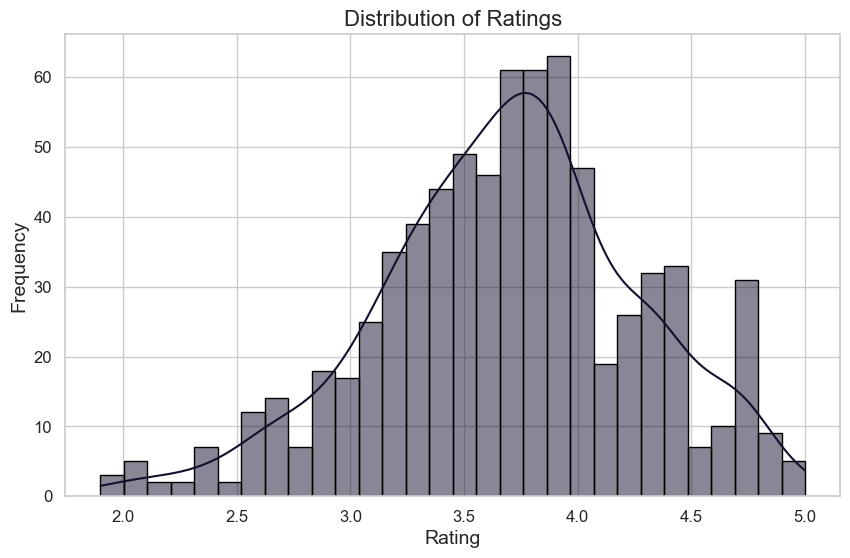

In [281]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Rating', data=df, bins=30, kde=True, edgecolor='black', color=custom_colors[2])


plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [282]:
#The median is generally more robust to skewness and outliers compared to the mean.
#robust in statistics and data analysis refers to the ability of a method or measure to remain effective and reliable under various conditions
df['Rating'].fillna(df['Rating'].median(), inplace=True)

#2. company size

In [283]:
df['CompanySize'].value_counts()

CompanySize
1001-5000     150
501-1000      134
10000++       130
201-500       117
51-200         94
5001-10000     76
1-50           31
Unknown         9
Name: count, dtype: int64

In [284]:
df['CompanySize'].fillna('Unknown', inplace=True)

3. Founded year

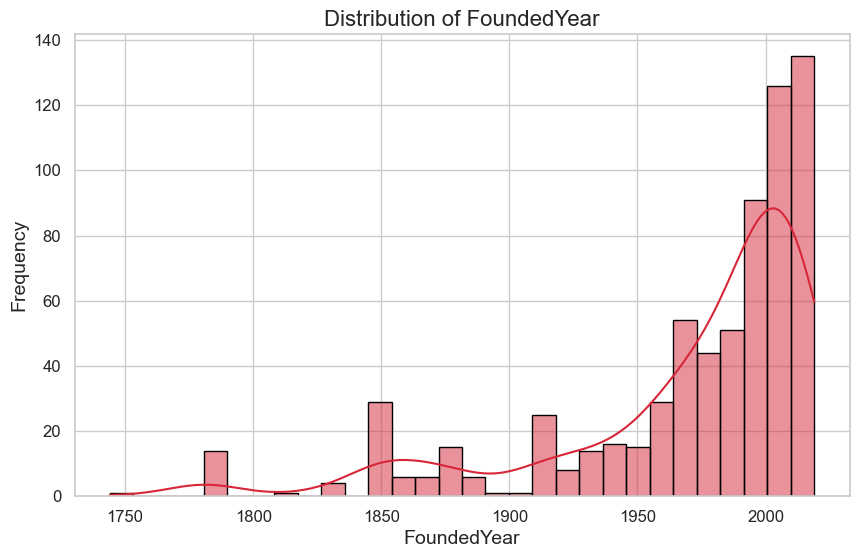

In [285]:
plt.figure(figsize=(10, 6))
sns.histplot(x='FoundedYear', data=df, bins=30, kde=True, color=custom_colors[0], edgecolor='black')

plt.title('Distribution of FoundedYear', fontsize=16)
plt.xlabel('FoundedYear', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [286]:
df['FoundedYear'].fillna(df['FoundedYear'].median(), inplace=True)

4. CompanyAge

In [287]:
df['CompanyAge'].fillna(2024 - df['FoundedYear'], inplace=True)

4. YearsofExperience

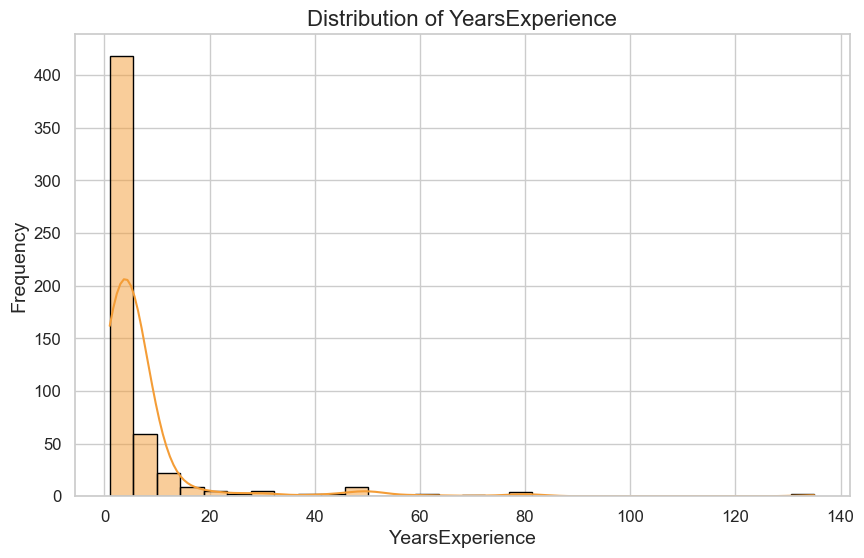

In [290]:
plt.figure(figsize=(10, 6))
sns.histplot(x='YearsofExperience', data=df, bins=30, kde=True, color=custom_colors[3], edgecolor='black')


plt.title('Distribution of YearsExperience', fontsize=16)
plt.xlabel('YearsExperience', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [296]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[['YearsofExperience']] = knn_imputer.fit_transform(df[['YearsofExperience']])

5. AverageRevenue  

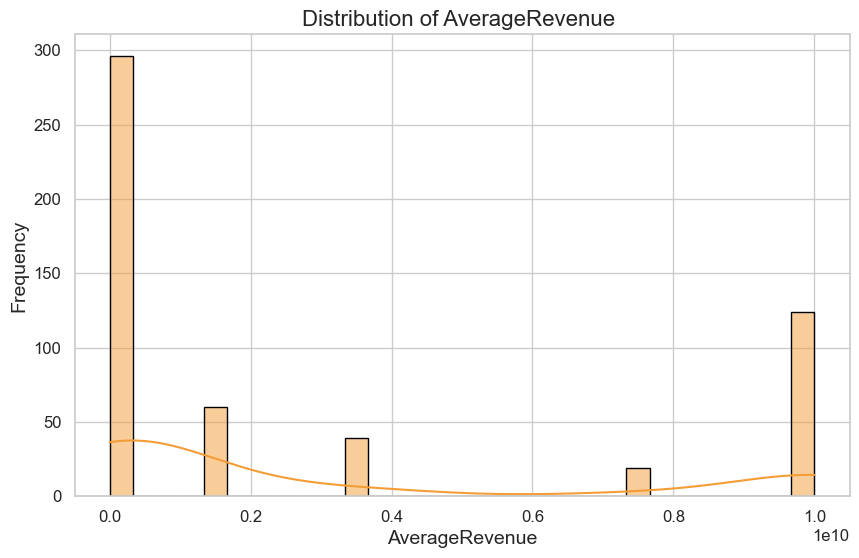

In [292]:
plt.figure(figsize=(10, 6))
sns.histplot(x='AverageRevenue', data=df, bins=30, kde=True, color=custom_colors[3], edgecolor='black')


plt.title('Distribution of AverageRevenue ', fontsize=16)
plt.xlabel('AverageRevenue', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [297]:
knn_imputer = KNNImputer(n_neighbors=5)
df[[ 'AverageRevenue']] = knn_imputer.fit_transform(df[[ 'AverageRevenue']])

In [298]:
df['OwnershipType'].replace('-1', df['OwnershipType'].mode()[0], inplace=True)
df['Sector'].replace('-1', df['Sector'].mode()[0], inplace=True)


In [300]:
df.isnull().sum()

JobTitle               0
SalaryEstimate         0
Rating                 0
CompanyName            0
CompanySize            0
FoundedYear            0
OwnershipType          0
Industry               0
Sector                 0
MinSalary              0
MaxSalary              0
AverageSalary          0
state                  0
City                   0
CompanyAge             0
AverageRevenue         0
NumberOfCompetitors    0
Experience_Level       0
RequiredSkills         0
EducationLevel         0
YearsofExperience      0
SalaryCategory         0
dtype: int64

In [305]:
df.to_csv('cleaned_glassdoor_jobs.csv',index=False)